<a href="https://colab.research.google.com/github/nikitajarad/SEM-6_DS-Practicals-SL3-/blob/main/SL3_Data_Science_Practicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Data Wrangling, I
Perform the following operations using Python on any open source dataset (e.g., data.csv)

In [ ]:
import pandas as pd
import seaborn as sns

iris = pd.read_csv('Iris.csv')
# Data Preprocessing
# Check for missing values
missing_values = iris.isnull().sum()
print("Missing Values:\n", missing_values)

# Get initial statistics
description = iris.describe()
print("\nInitial Statistics:\n", description)

# Check dimensions of the data frame
print("\nDimensions:", iris.shape)

# Step 5: Data Formatting and Normalization
# Check data types
print("\nData Types:\n", iris.dtypes)

# Step 6: Convert categorical variables into quantitative variables
iris_species= pd.get_dummies(iris, columns=['Species'])

# Display the first few rows of the encoded data frame
print("\nEncoded Data:\n", iris_species.head())


2) Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.

In [29]:
import pandas as pd
import numpy as np

# Create a DataFrame with student information
data = {
    'Student_ID': [1, 2, 3, 4, 5],
    'Age': [20, 21, 19, 22, 20],
    'Math_Score': [85, 90, 75, np.nan, 80],
    'Science_Score': [78, 85, 70, 88, 82],
    'English_Score': [82, 88, 72, 85, 80]
}
df=pd.DataFrame(data)
print(df.head(5))
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
df.fillna(df.mean(), inplace=True)

# Step 2: Deal with outliers :- Calculate lower and upper bounds for outlier detection
Q1 = df['Science_Score'].quantile(0.25)
Q3 = df['Science_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value of the respective column
median = df['Science_Score'].median()
df['Science_Score'] = np.where((df['Science_Score'] < lower_bound) | (df['Science_Score'] > upper_bound), median, df['Science_Score'])

# Step 3: Apply data transformations :-Perform a log transformation on the 'Science_Score' variable to decrease skewness
df['Science_Score'] = np.log(df['Science_Score'])

# Display the modified DataFrame (showing only the first few rows)
print("\nModified DataFrame:\n", df.head())

   Student_ID  Age  Math_Score  Science_Score  English_Score
0           1   20        85.0             78             82
1           2   21        90.0             85             88
2           3   19        75.0             70             72
3           4   22         NaN             88             85
4           5   20        80.0             82             80
Missing Values:
 Student_ID       0
Age              0
Math_Score       1
Science_Score    0
English_Score    0
dtype: int64

Modified DataFrame:
    Student_ID  Age  Math_Score  Science_Score  English_Score
0           1   20        85.0       4.356709             82
1           2   21        90.0       4.442651             88
2           3   19        75.0       4.248495             72
3           4   22        82.5       4.477337             85
4           5   20        80.0       4.406719             80


3) Descriptive Statistics - Measures of Central Tendency and variability

In [ ]:
#Part 1
import pandas as pd
import numpy as np
df=pd.read_csv("employee_data.csv")
print(df.head())
print("Columns Name:-",df.columns)

def categorize_age(age):
    if 20 <= age < 30:
        return '20-30'
    elif 30 <= age < 40:
        return '30-40'
    elif 40 <= age < 50:
        return '40-50'
    elif 50 <= age < 60:
        return '50-60'
    else:
        return 'Unknown'

df['AgeGroup'] = df['age'].apply(categorize_age)
statistics = df.groupby('AgeGroup')['salary'].describe()
print("Summary Statistics for Salary Grouped by Age Group:\n", statistics)

print("Mean:-",df.groupby('AgeGroup')['salary'].mean())
print("Median:-",df.groupby('AgeGroup')['salary'].median())
print("Minimum:-",df.groupby('AgeGroup')['salary'].min())
print("Maximum:-",df.groupby('AgeGroup')['salary'].max())
print("Variance:-",df.groupby('AgeGroup')['salary'].var())
print("Standard Deviation:-",df.groupby('AgeGroup')['salary'].std())

In [ ]:
#Part 2
# Step 1: Load the iris dataset
iris_data = pd.read_csv('Iris.csv')
print(iris_data.head())
# Step 2: Filter data for each species
setosa_data = iris_data[iris_data['Species'] == 'Iris-setosa']
versicolor_data = iris_data[iris_data['Species'] == 'Iris-versicolor']
virginica_data = iris_data[iris_data['Species'] == 'Iris-virginica']

# Step 3: Display basic statistical details for each species
print("Basic Statistical Details for 'Iris-setosa':")
print(setosa_data.describe())
print("\nBasic Statistical Details for 'Iris-versicolor':")
print(versicolor_data.describe())
print("\nBasic Statistical Details for 'Iris-virginica':")
print(virginica_data.describe())


4) Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset.

Unnamed: 0          0
id                  0
groups              0
age                 0
healthy_eating      0
active_lifestyle    0
salary              0
AgeGroup            0
dtype: int64

Model Evaluation:
Mean Squared Error (MSE): 25.01767202384268
Root Mean Squared Error (RMSE): 5.0017668901941725
R-squared (R2): 0.6588520195508143


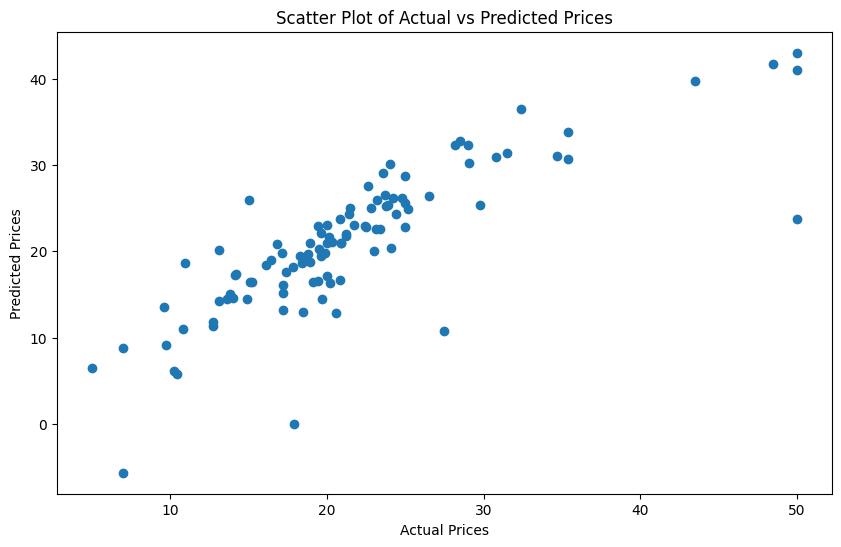

In [43]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
housing_data = pd.read_csv('HousingData.csv')

# Step 3: Handle missing values
# Replace NaN values with the mean of the respective column
print(df.isnull().sum())
housing_data.fillna(housing_data.mean(), inplace=True)

# Step 4: Prepare the data for training
X = housing_data.drop('MEDV', axis=1)
y = housing_data['MEDV']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Step 8: Make predictions
predictions = model.predict(X_test)

# Step 9: Plot scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

5) Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [45]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load the dataset
social_data = pd.read_csv('Social_Network_Ads.csv')

print(social_data.isnull().sum())
# Step 3: Prepare the data
X = social_data[['Age', 'EstimatedSalary']]
y = social_data['Purchased']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 8: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 9: Compute various performance metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 10: Print the confusion matrix and performance metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
Confusion Matrix:
[[50  2]
 [ 9 19]]

Performance Metrics:
Accuracy: 0.8625
Error Rate: 0.13749999999999996
Precision: 0.9047619047619048
Recall: 0.6785714285714286
F1 Score: 0.7755102040816326


6) Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on
the given dataset.

In [53]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Step 2: Load the dataset
iris_data = pd.read_csv('Iris.csv')
print("Missing Values:")
print(iris_data.isnull().sum())
print("\nDuplicates:")
print(iris_data.duplicated().sum())
# Step 3: Prepare the data
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Step 4: Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 9: Compute various performance metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Step 10: Print the confusion matrix and performance metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Duplicates:
0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Performance Metrics:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0


7) Text Analytics
1. Extract Sample document and apply following document preprocessing methods:
Tokenization, POS Tagging, stop words removal, Stemming and Lemmatization.
2. Create representation of documents by calculating Term Frequency and Inverse
DocumentFrequency.

In [54]:
# Step 1: Import required libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 2: Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

# Step 3: Sample document
sample_document = "Hello! I am Nikita.How are you "

# Step 4: Tokenization
tokens = word_tokenize(sample_document)

# Step 5: POS Tagging
pos_tags = pos_tag(tokens)

# Step 6: Stop Words Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

# Step 7: Stemming
porter = PorterStemmer()
stemmed_tokens = [porter.stem(token) for token in filtered_tokens]

# Step 8: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Step 9: Create representation using TF-IDF
corpus = [sample_document]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 10: Print the results
print("Tokenization:")
print(tokens)
print("\nPOS Tagging:")
print(pos_tags)
print("\nStop Words Removal:")
print(filtered_tokens)
print("\nStemming:")
print(stemmed_tokens)
print("\nLemmatization:")
print(lemmatized_tokens)
print("\nTF-IDF Representation:")
print(tfidf_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Tokenization:
['Hello', '!', 'I', 'am', 'Nikita.How', 'are', 'you']

POS Tagging:
[('Hello', 'NN'), ('!', '.'), ('I', 'PRP'), ('am', 'VBP'), ('Nikita.How', 'RB'), ('are', 'VBP'), ('you', 'PRP')]

Stop Words Removal:
['Hello', '!', 'Nikita.How']

Stemming:
['hello', '!', 'nikita.how']

Lemmatization:
['Hello', '!', 'Nikita.How']

TF-IDF Representation:
         am       are     hello       how    nikita       you
0  0.408248  0.408248  0.408248  0.408248  0.408248  0.408248


8) Data Visualization I
1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about
the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we
can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger
is distributed by plotting a histogram.

Missing Values:-
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
After Preprocessing:-
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


<ipython-input-72-e08f0257b510>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x = titanic['age'], bins = 10,kde=False)


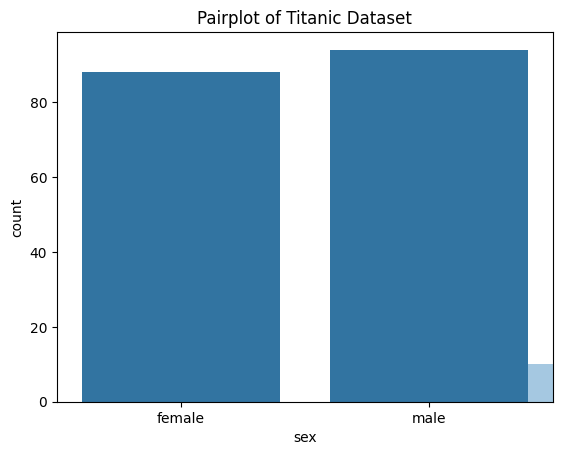

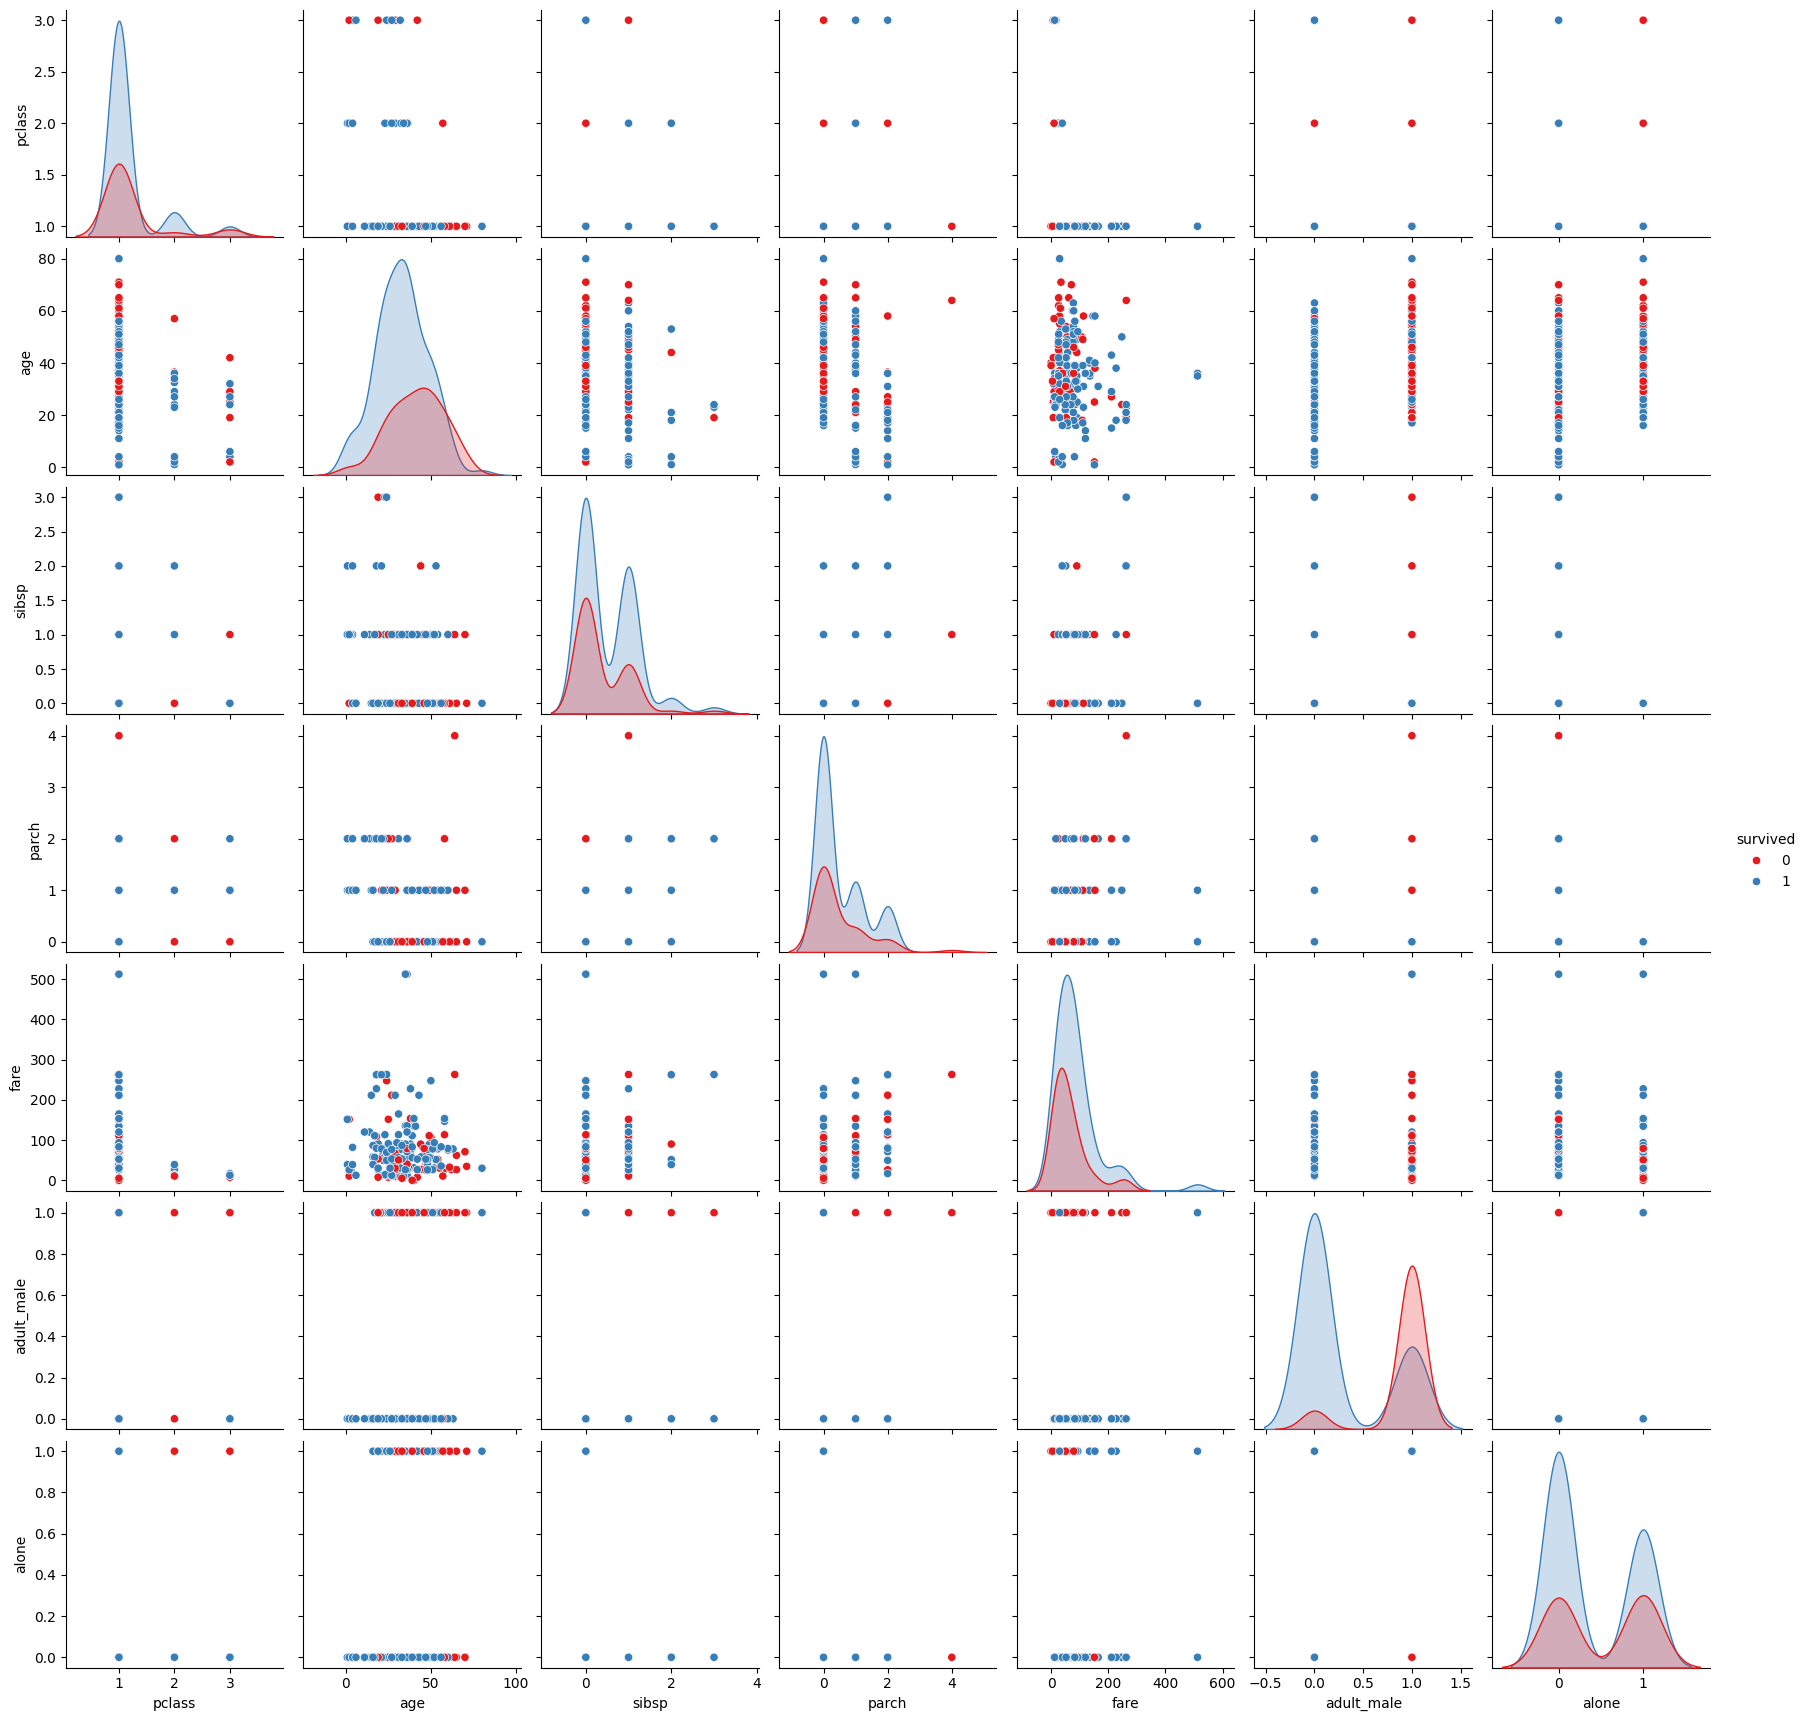

In [72]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
titanic = sn.load_dataset('titanic')
sn.load_dataset('titanic')
print("Missing Values:-\n",titanic.isnull().sum())
titanic.dropna(inplace=True)
print("After Preprocessing:-\n",titanic.isnull().sum())

plt.title('Distribution plot of Titanic Dataset')
sn.distplot(x = titanic['age'], bins = 10,kde=False)

plt.title('Countplot of Titanic Dataset')
sn.countplot(x='sex', data=titanic)

plt.title('Pairplot of Titanic Dataset')
sn.pairplot(titanic, hue='survived', palette='Set1')


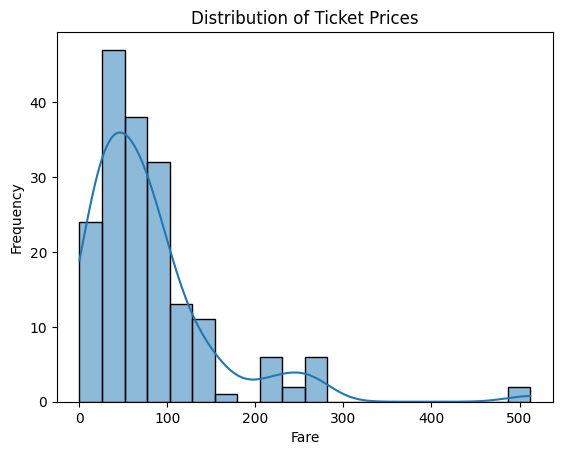

In [74]:
sns.histplot(titanic['fare'], bins=20, kde=True)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

9) Data Visualization II
1. Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for distribution of
age with respect to each gender along with the information about whether they survived or not. (Column names : 'sex' and 'age')
2. Write observations on the inference from the above statistics.

Missing Values:-
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
After Preprocessing:-
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


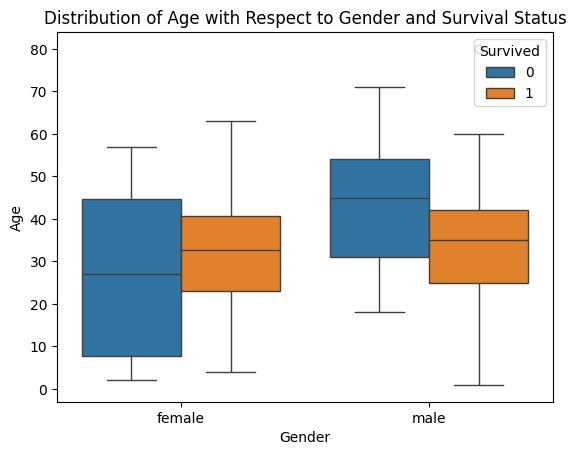

In [76]:
# Step 1: Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')
print("Missing Values:-\n",titanic_data.isnull().sum())
titanic_data.dropna(inplace=True)
print("After Preprocessing:-\n",titanic.isnull().sum())

# Step 3: Plot box plot for distribution of age with respect to gender and survival status
sns.boxplot(data=titanic_data, x='sex', y='age', hue='survived')
plt.title('Distribution of Age with Respect to Gender and Survival Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()


10) Data Visualization III
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a boxplot for each feature in the dataset.
4. Compare distributions and identify outliers.

features and their types :- Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
histogram for each feature


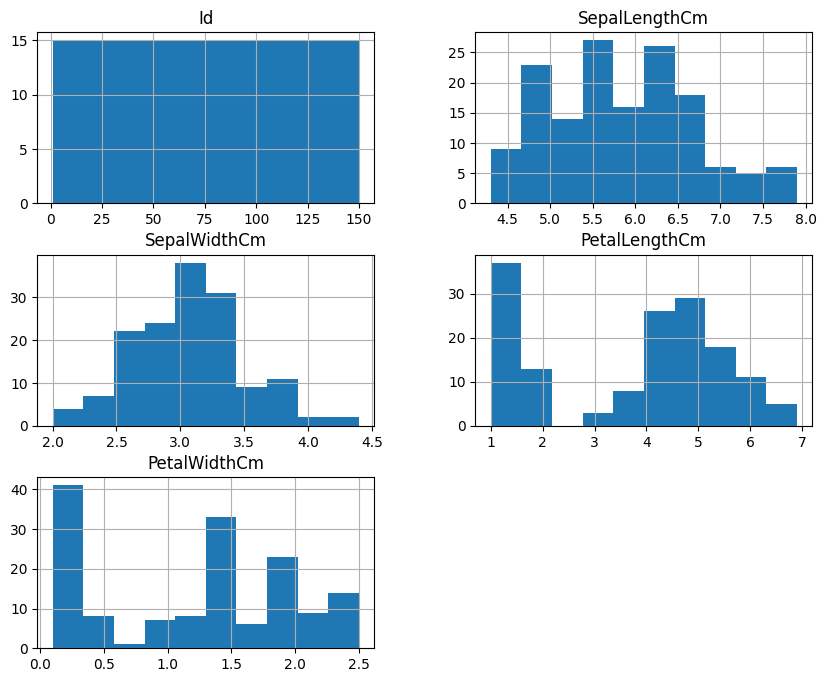

Boxplot for each feature


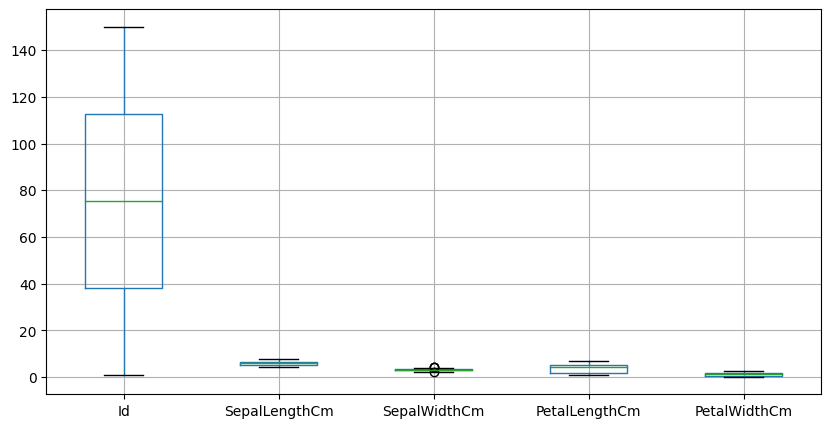

Identified outliers:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   
15  16            5.7           4.4            1.5           0.4   

            Species  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  
15      Iris-setosa  


In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris=pd.read_csv("Iris.csv")

print("features and their types :-",iris.dtypes)

print("histogram for each feature")
iris.hist(figsize=(10,8))
plt.show()

print("Boxplot for each feature")
iris.boxplot(figsize=(10,5))
plt.show()

outliers = []
for feature in iris.columns[:-1]:
    Q1 = iris[feature].quantile(0.25)
    Q3 = iris[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers.extend(iris[(iris[feature] < Q1 - 1.5 * IQR) | (iris[feature] > Q3 + 1.5 * IQR)].index)

outliers = list(set(outliers))  # Remove duplicate indices
print("Identified outliers:")
print(iris.iloc[outliers])

11)B.Write a simple program in SCALA using Apache Spark framework

In [ ]:
object HelloWorld {
  def main(args: Array[String]): Unit = {
    println("Hello, World!")
  }
}